In [7]:
!pip install python-ffmpeg pyannote.audio python-dotenv --quiet


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
import os
import shutil
import glob
import json
from ffmpeg import FFmpeg
import tqdm.auto as tqdm
from pyannote.audio import Pipeline as PyannotePipeline
from pyannote.audio.pipelines.utils.hook import ProgressHook
import dotenv
import torch
import torchaudio 
from utils import *

dotenv.load_dotenv()

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

In [4]:
os.makedirs("audio_tracks", exist_ok=True)

video_paths = glob.glob("../RuPaul's Drag Race/*/*", recursive=True)
for video_path in tqdm.tqdm(video_paths):
    audio_path = os.path.join("audio_tracks", ".".join(os.path.basename(video_path).split(".")[:-1]) + ".mp3")
    if os.path.exists(audio_path):
        continue
    # audio_path = unique_path(audio_path)
    FFmpeg().input(video_path).output(audio_path).execute()

0it [00:00, ?it/s]

In [5]:
diarization_pipeline = PyannotePipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1", use_auth_token=os.getenv("HUGGINGFACE_TOKEN")
)
diarization_pipeline.to(device)

In [6]:
with ProgressHook() as hook:
    waveform, sample_rate = torchaudio.load("audio_tracks/RuPaul_s Drag Race S01E01.mp3")
    diarization = diarization_pipeline({"waveform": waveform, "sample_rate": sample_rate}, hook=hook)

Output()

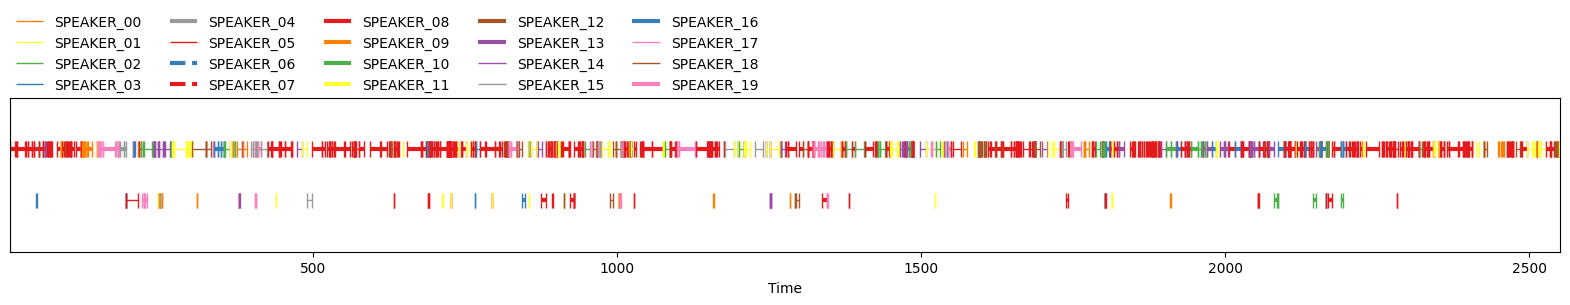

In [7]:
diarization

In [8]:
import pickle

In [9]:
with open("test_diarization.pkl", "wb") as f:
    pickle.dump(diarization, f)

In [10]:
diarization = pickle.load(open("test_diarization.pkl", "rb"))

In [16]:
for interval, turn_id, speaker_id in diarization.itertracks(yield_label=True):
    print(f"{speaker_id} speaks between {interval.start:.1f}s and {interval.end:.1f}s")

SPEAKER_08 speaks between 1.2s and 10.0s
SPEAKER_08 speaks between 10.8s and 12.6s
SPEAKER_08 speaks between 12.6s and 26.1s
SPEAKER_08 speaks between 26.9s and 31.0s
SPEAKER_08 speaks between 31.6s and 36.7s
SPEAKER_08 speaks between 37.4s and 40.0s
SPEAKER_08 speaks between 41.5s and 48.2s
SPEAKER_16 speaks between 44.0s and 44.8s
SPEAKER_10 speaks between 49.0s and 49.2s
SPEAKER_08 speaks between 49.2s and 55.0s
SPEAKER_13 speaks between 55.0s and 55.8s
SPEAKER_08 speaks between 55.8s and 58.0s
SPEAKER_13 speaks between 58.1s and 60.4s
SPEAKER_08 speaks between 61.3s and 63.8s
SPEAKER_08 speaks between 64.4s and 65.5s
SPEAKER_08 speaks between 67.5s and 68.7s
SPEAKER_08 speaks between 69.2s and 70.3s
SPEAKER_08 speaks between 79.1s and 85.0s
SPEAKER_09 speaks between 85.0s and 85.4s
SPEAKER_11 speaks between 85.4s and 85.6s
SPEAKER_09 speaks between 85.6s and 86.4s
SPEAKER_11 speaks between 86.4s and 86.4s
SPEAKER_09 speaks between 86.4s and 86.4s
SPEAKER_11 speaks between 86.4s and